# Problem Statement
**The Toxic Pesticides**

*Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.*

*Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.*

*You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.*

In [42]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import BaggingClassifier

In [3]:
train  = pd.read_csv('train_agriculture.csv')
test = pd.read_csv('test_agriculture.csv')
sample_sub = pd.read_csv('sample_submission_agriculture.csv')

In [4]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [6]:
sample_sub.head()

,Unnamed: 0,ID,Crop_Damage
0,0,F00000002,1
1,1,F00000011,1
2,2,F00000014,1
3,3,F00000015,1
4,4,F00000016,1


In [7]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59310 entries, 0 to 59309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------        

(None, None)

In [8]:
train.describe(), test.describe()

(       Estimated_Insects_Count     Crop_Type     Soil_Type  \
 count             88858.000000  88858.000000  88858.000000   
 mean               1399.012210      0.284375      0.458417   
 std                 849.048781      0.451119      0.498271   
 min                 150.000000      0.000000      0.000000   
 25%                 731.000000      0.000000      0.000000   
 50%                1212.000000      0.000000      0.000000   
 75%                1898.000000      1.000000      1.000000   
 max                4097.000000      1.000000      1.000000   
 
        Pesticide_Use_Category  Number_Doses_Week  Number_Weeks_Used  \
 count            88858.000000       88858.000000       79858.000000   
 mean                 2.264186          25.849952          28.623970   
 std                  0.461772          15.554428          12.391881   
 min                  1.000000           0.000000           0.000000   
 25%                  2.000000          15.000000          20.000000   

In [9]:
train.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

In [10]:
test.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          5893
Number_Weeks_Quit             0
Season                        0
dtype: int64

In [11]:
# fill up missing values with median
train['Number_Weeks_Used'] = train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].median())
test['Number_Weeks_Used'] = test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].median())

In [12]:
train.isnull().sum().sum(), test.isnull().sum().sum()

(0, 0)

<AxesSubplot:>

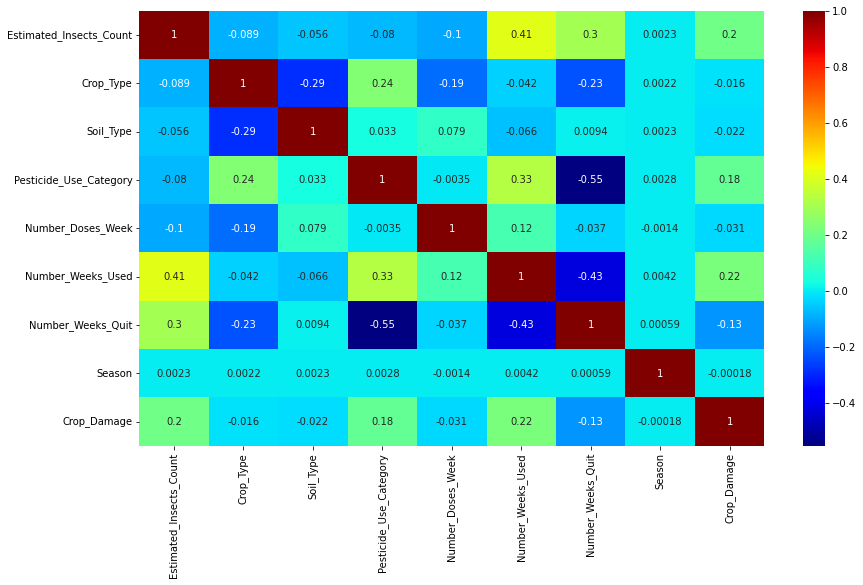

In [13]:
plt.figure(figsize=(14,8))
sns.heatmap(train.corr(), annot=True, cmap = "jet")

In [22]:
damage = train.groupby(by=("Crop_Damage")).sum().reset_index()
damage

,Crop_Damage,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,97675485,21460,34397,165520,1939040,2035257.0,750594,140847
1,1,22633880,3103,5354,29741,297535,417472.0,93911,23310
2,2,4004062,706,983,5930,60400,85124.0,7642,4403


C:\Users\anoop\Data Science\envs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Crop_Damage', ylabel='Density'>

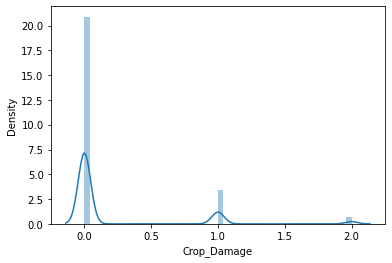

In [23]:
sns.distplot(train['Crop_Damage'])

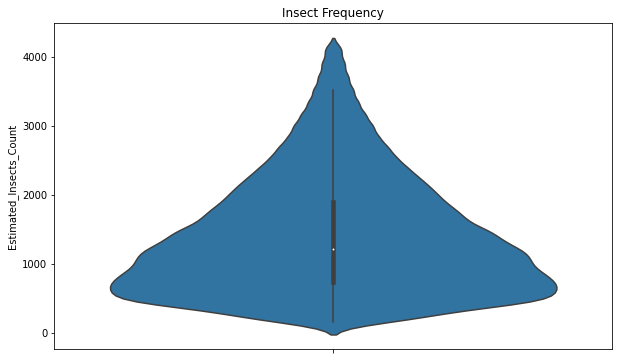

In [24]:
plt.figure(figsize=(10,6))
plt.title("Insect Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Estimated_Insects_Count"])
plt.show()

In [25]:
insect = train.groupby(by=("Estimated_Insects_Count"))["Crop_Damage"].sum().reset_index()
insect

,Estimated_Insects_Count,Crop_Damage
0,150,13
1,151,2
2,168,12
3,169,2
4,188,10
...,...,...
66,3702,261
67,3895,159
68,3896,57
69,4096,111


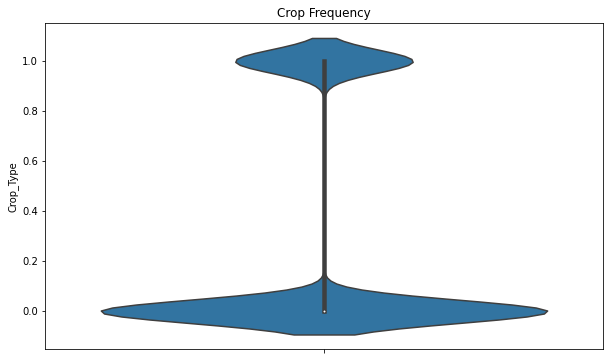

In [26]:
plt.figure(figsize=(10,6))
plt.title("Crop Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Crop_Type"])
plt.show()

In [27]:
crop = train.groupby(by=("Crop_Type"))["Crop_Damage"].sum().reset_index()
crop

,Crop_Type,Crop_Damage
0,0,12418
1,1,4515


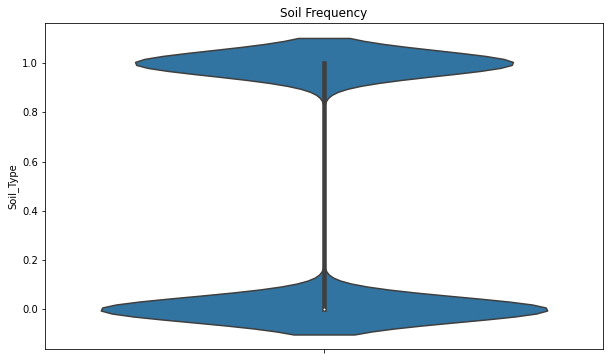

In [28]:
plt.figure(figsize=(10,6))
plt.title("Soil Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Soil_Type"])
plt.show()

In [29]:
soil = train.groupby(by=("Soil_Type"))["Crop_Damage"].sum().reset_index()
soil

,Soil_Type,Crop_Damage
0,0,9613
1,1,7320


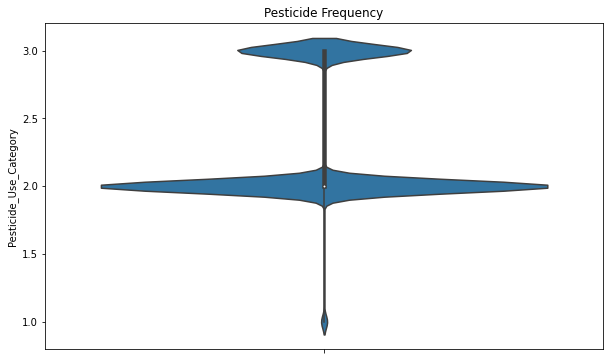

In [30]:
plt.figure(figsize=(10,6))
plt.title("Pesticide Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Pesticide_Use_Category"])
plt.show()

In [31]:
pest = train.groupby(by=("Pesticide_Use_Category"))["Crop_Damage"].sum().reset_index()
pest

,Pesticide_Use_Category,Crop_Damage
0,1,884
1,2,7430
2,3,8619


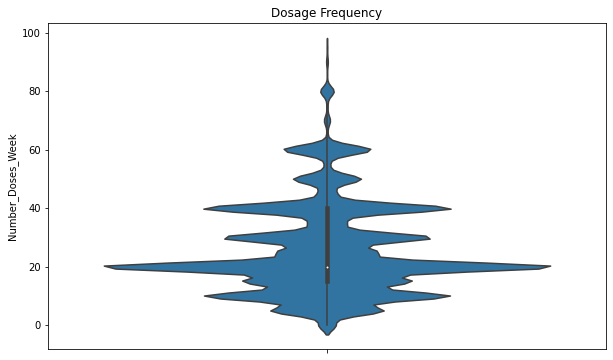

In [32]:
plt.figure(figsize=(10,6))
plt.title("Dosage Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Number_Doses_Week"])
plt.show()

In [33]:
dose = train.groupby(by=("Number_Doses_Week"))["Crop_Damage"].sum().reset_index()
dose

,Number_Doses_Week,Crop_Damage
0,0,884
1,5,553
2,10,1836
3,15,1190
4,20,5558
5,25,692
6,30,2061
7,35,215
8,40,2615
9,45,81


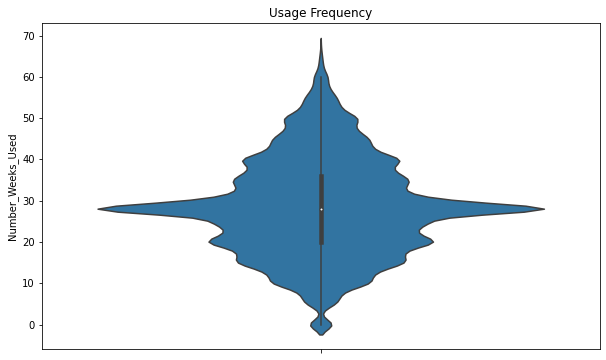

In [34]:
plt.figure(figsize=(10,6))
plt.title("Usage Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Number_Weeks_Used"])
plt.show()

In [35]:
train.Number_Weeks_Used=train.Number_Weeks_Used.astype(int)
test.Number_Weeks_Used=test.Number_Weeks_Used.astype(int)

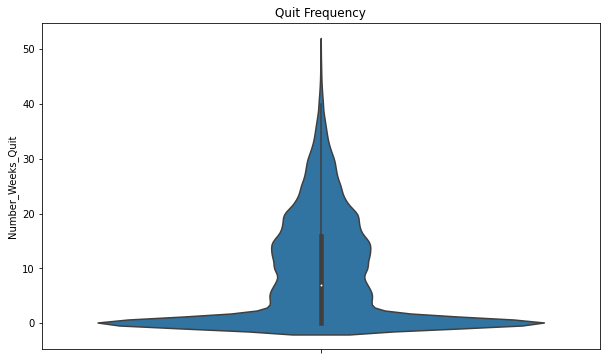

In [36]:
plt.figure(figsize=(10,6))
plt.title("Quit Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Number_Weeks_Quit"])
plt.show()

In [37]:
quit = train.groupby(by=("Number_Weeks_Quit"))["Crop_Damage"].sum().reset_index()
quit

,Number_Weeks_Quit,Crop_Damage
0,0,9557
1,1,147
2,2,241
3,3,286
4,4,278
5,5,390
6,6,326
7,7,308
8,8,277
9,9,231


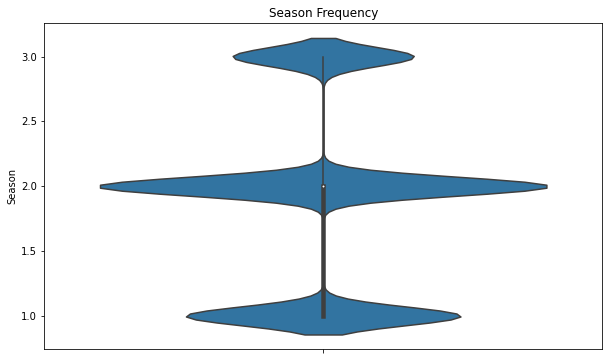

In [38]:
plt.figure(figsize=(10,6))
plt.title("Season Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Season"])
plt.show()

In [14]:
season = train.groupby(by=("Season"))["Crop_Damage"].sum().reset_index()
season

,Season,Crop_Damage
0,1,5070
1,2,8543
2,3,3320


In [15]:
#define x, y and x_test
ID = test.ID

y = train.Crop_Damage
X = train.drop(["ID", "Crop_Damage"], axis=1)
X_test = test.drop(["ID"], axis=1)
X.shape, y.shape, X_test.shape

((88858, 8), (88858,), (59310, 8))

In [17]:
#Data preprocessing
scaler = StandardScaler()

X=scaler.fit_transform(X)
X_test=scaler.transform(X_test)

In [18]:
np.mean(X),np.std(X)

(5.618459674012923e-17, 0.9999999999999998)

In [19]:
feat_cols = ['feature'+str(i) for i in range(X.shape[1])]
feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7']

In [23]:
normalised = pd.DataFrame(X,columns=feat_cols)
normalised

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7
0,-1.426324,1.586343,-0.920021,-2.737701,-1.661912,-2.430909,-0.968629,-1.278962
1,-1.401591,1.586343,-0.920021,-2.737701,-1.661912,-2.430909,-0.968629,0.146924
2,-1.345057,1.586343,-0.920021,-2.737701,-1.661912,-2.430909,-0.968629,0.146924
3,-1.345057,1.586343,1.086932,-2.737701,-1.661912,-2.430909,-0.968629,0.146924
4,-1.244944,1.586343,-0.920021,-2.737701,-1.661912,-2.430909,-0.968629,0.146924
...,...,...,...,...,...,...,...,...
88853,2.282553,1.586343,-0.920021,-0.572116,-1.019005,-1.409546,3.475557,1.572811
88854,2.493378,1.586343,-0.920021,-0.572116,-1.019005,-0.728638,2.869532,-1.278962
88855,2.493378,1.586343,-0.920021,-0.572116,-0.697551,0.973634,-0.160595,0.146924
88856,2.712448,1.586343,-0.920021,-0.572116,-1.019005,-0.303070,0.849447,1.572811


In [25]:
#PCA
pca_farm = PCA(n_components=2)
principalComponents_farm = pca_farm.fit_transform(X)


In [26]:
principal_farm_Df = pd.DataFrame(data = principalComponents_farm
             , columns = ['principal component 1', 'principal component 2'])
principal_farm_Df

,principal component 1,principal component 2
0,1.349260,-3.587391
1,1.346457,-3.562162
2,1.350960,-3.526913
3,1.552589,-3.209151
4,1.358934,-3.464491
...,...,...
88853,2.685456,-0.162139
88854,2.048274,0.297156
88855,-0.553116,1.123599
88856,0.630391,0.535471


In [27]:
print('Explained variation per principal component: {}'.format(pca_farm.explained_variance_ratio_))

Explained variation per principal component: [0.24591841 0.17963404]


<Figure size 432x288 with 0 Axes>

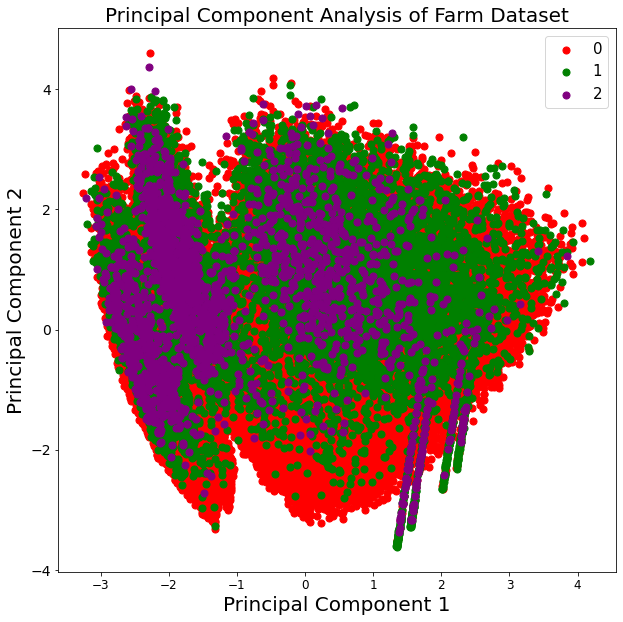

In [29]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.title("Principal Component Analysis of Farm Dataset",fontsize=20)
targets = [0, 1, 2]
colors = ['r', 'g', 'purple']
for target, color in zip(targets,colors):
    indicesToKeep = y == target
    plt.scatter(principal_farm_Df.loc[indicesToKeep, 'principal component 1'], principal_farm_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

C:\Users\anoop\AppData\Local\Temp/ipykernel_2204/2700098128.py:10: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
C:\Users\anoop\AppData\Local\Temp/ipykernel_2204/2700098128.py:24: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.choose(y, [1, 2, 0, 3, 4, 5, 6, 7]).astype(np.float)


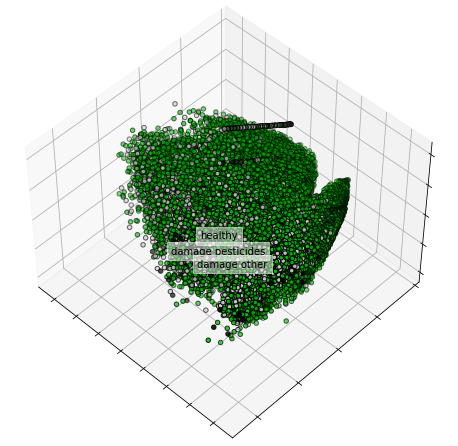

In [33]:
#Visualize using 3d 
Label = LabelEncoder()

y = train.Crop_Damage

y = Label.fit_transform(y)

fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [('healthy', 0), ('damage pesticides', 1), ('damage other', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(),name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0, 3, 4, 5, 6, 7]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

In [34]:
X = pca.inverse_transform(X)

In [37]:
#split training set for training and testing

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1, test_size=0.10, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((79972, 8), (8886, 8), (79972,), (8886,), (59310, 8))

In [49]:
model = BaggingClassifier(base_estimator=LinearSVC(class_weight=None, dual=False, max_iter=1000), random_state=1).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.8354549092182264


In [50]:
#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model.get_params()
print(params)

{'base_estimator__C': 1.0, 'base_estimator__class_weight': None, 'base_estimator__dual': False, 'base_estimator__fit_intercept': True, 'base_estimator__intercept_scaling': 1, 'base_estimator__loss': 'squared_hinge', 'base_estimator__max_iter': 1000, 'base_estimator__multi_class': 'ovr', 'base_estimator__penalty': 'l2', 'base_estimator__random_state': None, 'base_estimator__tol': 0.0001, 'base_estimator__verbose': 0, 'base_estimator': LinearSVC(dual=False), 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}


In [51]:
y_pred = model.predict(X_val)

df=pd.DataFrame({'Actual': y_val, 'Predicted':y_pred.ravel()})
df

,Actual,Predicted
0,1.0,1.0
1,1.0,1.0
2,2.0,1.0
3,1.0,1.0
4,1.0,1.0
...,...,...
8881,2.0,1.0
8882,2.0,1.0
8883,1.0,1.0
8884,1.0,1.0


C:\Users\anoop\Data Science\envs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

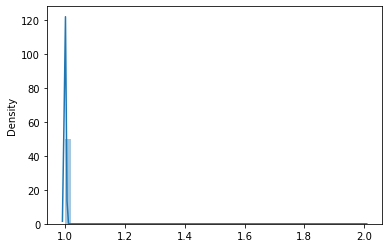

In [52]:
sns.distplot(y_pred)

In [53]:
import collections
print(collections.Counter(y_val))

Counter({1.0: 7424, 2.0: 1231, 0.0: 231})


In [54]:
print(collections.Counter(y_pred.ravel()))

Counter({1.0: 8883, 2.0: 3})


In [55]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_val, y_pred)

array([[   0,  231,    0],
       [   0, 7423,    1],
       [   0, 1229,    2]], dtype=int64)

In [56]:
#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_val, y_pred))

#Create DataFrame from confmtrx array 
pd.DataFrame(confmtrx, index=['Alive','Other_Causes', 'Pesticides'],
columns=['predicted_Alive', 'predicted_Other_Causes', 'predicted_Pesticides'])

,predicted_Alive,predicted_Other_Causes,predicted_Pesticides
Alive,0,231,0
Other_Causes,0,7423,1
Pesticides,0,1229,2


In [57]:
print('Accuracy Score:',accuracy_score(y_val, y_pred))  
#Create classification report
class_report=classification_report(y_val, y_pred)
print(class_report)

Accuracy Score: 0.8355840648210668
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       231
         1.0       0.84      1.00      0.91      7424
         2.0       0.67      0.00      0.00      1231

    accuracy                           0.84      8886
   macro avg       0.50      0.33      0.30      8886
weighted avg       0.79      0.84      0.76      8886



C:\Users\anoop\Data Science\envs\Python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anoop\Data Science\envs\Python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anoop\Data Science\envs\Python\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
predictions = model.predict(X_test)
predictions

array([1., 1., 1., ..., 1., 1., 1.])

In [59]:
submission = pd.DataFrame({
        "ID": ID,
        "Crop_Damage": predictions.ravel()
    })
submission.to_csv('submission4.csv', index=False)
submission

,ID,Crop_Damage
0,F00000002,1.0
1,F00000007,1.0
2,F00000011,1.0
3,F00000013,1.0
4,F00000014,1.0
...,...,...
59305,F00155937,1.0
59306,F00155940,1.0
59307,F00155941,1.0
59308,F00155943,1.0
